In [1]:
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATH_TO_PARENT_DIR = Path(os.getcwd()).resolve().parent.parent

PATH_TO_DATA_DIR = PATH_TO_PARENT_DIR / "Data"
PATH_TO_CLEANED_DICOM_DF = PATH_TO_DATA_DIR / "cleaned_dicom_df.feather"
PATH_TO_TRAIN_TEST_SPLIT = PATH_TO_DATA_DIR / "train_test_split.feather"

PATH_TO_FINAL_DIR = PATH_TO_PARENT_DIR / "Model" / "Justin" / "final"
PATH_TO_FINAL_DIR

WindowsPath('C:/Users/justi/Desktop/inferring_body_weight_from_ct_scans/Model/Justin/final')

In [3]:
# print all feather files in PATH_TO_FINAL_DIR
for file in PATH_TO_FINAL_DIR.glob("*.feather"):
    print(file)

C:\Users\justi\Desktop\inferring_body_weight_from_ct_scans\Model\Justin\final\predictions_onlyCount_colDropAll_keepOrig_bincount_150.feather
C:\Users\justi\Desktop\inferring_body_weight_from_ct_scans\Model\Justin\final\predictions_onlyCount_colDropAll_keepOrig_bincount_75.feather
C:\Users\justi\Desktop\inferring_body_weight_from_ct_scans\Model\Justin\final\predictions_onlyCount_colDropAll_keepOrig_HU.feather
C:\Users\justi\Desktop\inferring_body_weight_from_ct_scans\Model\Justin\final\predictions_onlyCount_colDropAll_keepOrig_seg.feather
C:\Users\justi\Desktop\inferring_body_weight_from_ct_scans\Model\Justin\final\predictions_onlyCount_colDropAll_keepOrig_seg_150.feather
C:\Users\justi\Desktop\inferring_body_weight_from_ct_scans\Model\Justin\final\predictions_onlyCount_colDropAll_keepOrig_seg_75.feather
C:\Users\justi\Desktop\inferring_body_weight_from_ct_scans\Model\Justin\final\predictions_onlyCount_colDropAll_keepOrig_seg_air.feather
C:\Users\justi\Desktop\inferring_body_weight_from

In [4]:
# Load all feather files PATH_TO_FINAL_DIR into a dicrionary with the key being the file name without extension
dfs = {}
for file in PATH_TO_FINAL_DIR.glob("*.feather"):
    key = file.stem
    dfs[key] = pd.read_feather(file)

In [5]:
dfs["predictions_onlyCount_colDropAll_keepOrig_bincount_150"]

,SeriesInstanceUID,PredictedPatientWeight
0,1.2.40.0.13.1.28611523484845610500759615941748...,47.850093
1,1.2.40.0.13.1.29372383852567236771106277061240...,107.042920
2,1.2.40.0.13.1.79959759832434680761991964822026...,105.696240
3,1.2.40.0.13.1.24209483531338511718074425173759...,73.179005
4,1.2.40.0.13.1.33709088158668319679757985067945...,124.334714
...,...,...
2926,1.2.40.0.13.1.14447032145816928538722256306280...,71.778936
2927,1.2.40.0.13.1.22055339428679588669178744381225...,48.713027
2928,1.2.40.0.13.1.15802889953337295246497758301352...,62.509294
2929,1.2.40.0.13.1.56298341537091980176000389528343...,68.681887


In [6]:
# For all dataframes in dfs join them on the columns "SeriesInstanceUID" and set the column name to the key
all_results_df = None
for key, value in dfs.items():
    value = value.rename(columns={"PredictedPatientWeight": f"PredictedPatientWeight_{key}"})
    if all_results_df is None:
        all_results_df = value
    else:
        all_results_df = pd.merge(all_results_df, value, on="SeriesInstanceUID", how="inner")

all_results_df

,SeriesInstanceUID,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_bincount_150,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_bincount_75,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_HU,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_150,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_75,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_air,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_HU,PredictedPatientWeight_predictions_onlyCount_colDropVolume_keepOrig_bincount_150,...,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_keepOrig_seg_air,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_keepOrig_seg_HU,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_bincount_150,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_bincount_75,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_HU,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_150,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_75,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_air,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_HU
0,1.2.40.0.13.1.28611523484845610500759615941748...,47.850093,47.752680,47.503025,48.621991,48.431284,47.897430,47.339271,48.046753,48.387895,...,47.768445,47.541583,47.875298,47.207420,47.589720,48.888818,48.769464,47.519976,46.622942,47.180443
1,1.2.40.0.13.1.29372383852567236771106277061240...,107.042920,107.337541,108.997632,105.517945,105.653469,107.910474,107.394959,105.171335,104.723543,...,106.628157,105.234715,109.168562,107.923834,108.486669,104.543940,106.963545,106.383908,103.688088,103.948028
2,1.2.40.0.13.1.79959759832434680761991964822026...,105.696240,103.754406,101.829341,102.263172,103.560540,105.034628,101.763685,103.223762,106.558262,...,99.928620,104.344744,104.842352,102.908377,100.870474,98.038907,101.571810,103.247148,99.109918,104.952596
3,1.2.40.0.13.1.24209483531338511718074425173759...,73.179005,73.505686,76.274284,75.937073,74.008476,74.954098,73.241198,73.508334,75.143871,...,73.082371,73.842566,73.919340,73.462497,75.747029,76.818767,74.210183,73.725109,72.783656,73.054509
4,1.2.40.0.13.1.33709088158668319679757985067945...,124.334714,126.826887,122.947475,121.211251,124.213630,127.225135,122.096898,123.859515,124.896395,...,121.354379,123.232299,124.444905,125.379602,123.547022,125.579802,125.383778,125.426864,122.956825,122.928838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,1.2.40.0.13.1.14447032145816928538722256306280...,71.778936,73.626340,74.485411,74.301335,73.846091,74.576231,74.063660,73.986836,71.475534,...,74.306397,74.334643,72.319538,75.447551,75.962574,71.099719,73.964834,73.329317,72.281600,74.695571
2927,1.2.40.0.13.1.22055339428679588669178744381225...,48.713027,50.283600,48.577479,50.107838,47.755479,47.894970,49.509341,48.531518,49.106018,...,50.504252,49.941275,48.539742,47.828409,48.812357,47.982610,46.709306,47.654689,48.645821,48.939158
2928,1.2.40.0.13.1.15802889953337295246497758301352...,62.509294,62.952089,61.255884,64.401697,62.005649,60.568029,63.695967,60.341385,63.777851,...,65.127277,60.993582,62.524543,61.834729,62.852350,66.218862,61.827416,61.534998,64.937733,63.107540
2929,1.2.40.0.13.1.56298341537091980176000389528343...,68.681887,68.971149,70.759650,68.691670,67.946864,68.025596,68.880886,69.029395,70.162071,...,68.856878,67.881647,68.142313,67.635996,70.913450,68.179681,69.009462,68.810354,69.096209,68.348905


In [7]:
# Laod PATH_TO_CLEANED_DICOM_DF feather file
meta_df = pd.read_feather(PATH_TO_CLEANED_DICOM_DF)
train_test_split_df = pd.read_feather(PATH_TO_TRAIN_TEST_SPLIT)

meta_df

,PatientId,PatientAge,PatientSex,PatientWeight,PatientSize,BodyPart,Rows,Columns,SliceCount,PixelSpacing,SliceThickness,RescaleSlope,RescaleIntercept,SeriesInstanceUID,SliceDirectory
0,ANONYM-3X1ZSG,50,M,107.0,1.83,Kopf/Stamm/Teilkörper,512,512,903,1.171875,3.0,1.0,-1024.0,1.2.40.0.13.1.31071640450076763248773322620109...,/srv/GadM/Datasets/AIBA_CT_KG/2021-02/1004693C...
1,ANONYM-3X1ZSG_1,61,F,46.0,1.61,Stamm,512,512,263,0.976562,3.0,1.0,-1024.0,1.2.40.0.13.1.28611523484845610500759615941748...,/srv/GadM/Datasets/AIBA_CT_KG/2021-02/10046CC6...
2,ANONYM-3X1ZSG_2,59,M,107.0,1.72,Stamm,512,512,293,0.976562,3.0,1.0,-1024.0,1.2.40.0.13.1.29372383852567236771106277061240...,/srv/GadM/Datasets/AIBA_CT_KG/2021-02/10046DD0...
3,ANONYM-3X1ZSG_3,67,F,94.0,1.68,Kopf/Stamm,512,512,323,0.976562,3.0,1.0,-1024.0,1.2.40.0.13.1.18346535543421060503397480566267...,/srv/GadM/Datasets/AIBA_CT_KG/2021-02/10046EF8...
4,ANONYM-3X1ZSG_4,61,M,103.0,1.76,Ganzkörper,512,512,487,0.976562,4.0,1.0,-1024.0,1.2.40.0.13.1.12817359503655381020457398908758...,/srv/GadM/Datasets/AIBA_CT_KG/2021-02/1004703E...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,ANONYM-6LL37I_519,55,F,49.0,1.58,Stamm,512,512,567,1.171875,3.0,1.0,-1024.0,1.2.40.0.13.1.22055339428679588669178744381225...,/srv/GadM/Datasets/AIBA_CT_KG/2021-03/10063CCC...
5037,ANONYM-6LL37I_520,51,F,63.0,1.74,Stamm,512,512,293,0.976562,3.0,1.0,-1024.0,1.2.40.0.13.1.15802889953337295246497758301352...,/srv/GadM/Datasets/AIBA_CT_KG/2021-03/10064142...
5038,ANONYM-6LL37I_521,70,F,77.0,1.59,Kopf/Stamm,512,512,323,0.976562,3.0,1.0,-1024.0,1.2.40.0.13.1.12285507575477120912134857019998...,/srv/GadM/Datasets/AIBA_CT_KG/2021-03/10064396...
5039,ANONYM-6LL37I_522,90,M,69.0,1.76,Stamm,512,512,567,1.171875,3.0,1.0,-1024.0,1.2.40.0.13.1.56298341537091980176000389528343...,/srv/GadM/Datasets/AIBA_CT_KG/2021-03/10064626...


In [8]:
#where set_type = Validation
train_test_split_df = train_test_split_df[train_test_split_df["set_type"] == "Validation"]
train_test_split_df

,SeriesInstanceUID,set_type
10,1.2.40.0.13.1.28993903218149043348081372551120...,Validation
13,1.2.40.0.13.1.16484041000717506379634425838039...,Validation
14,1.2.40.0.13.1.15369166470016772395035691884739...,Validation
15,1.2.40.0.13.1.16934669894955102956241570719039...,Validation
16,1.2.40.0.13.1.12409468971190110111617676171220...,Validation
...,...,...
2900,1.2.40.0.13.1.26500194564796799093533783873459...,Validation
2903,1.2.40.0.13.1.26098479406692195187965168170625...,Validation
2916,1.2.40.0.13.1.11274952054175972577904171290621...,Validation
2922,1.2.40.0.13.1.41102358271786369454322905863480...,Validation


In [9]:
# From meta_df only use columns SeriesInstanceUID and PatientWeight
meta_df = meta_df[["SeriesInstanceUID", "PatientWeight"]]

final_df = pd.merge(train_test_split_df, meta_df, on="SeriesInstanceUID", how="inner")
final_df = pd.merge(final_df, all_results_df, on="SeriesInstanceUID", how="inner")

final_df

,SeriesInstanceUID,set_type,PatientWeight,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_bincount_150,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_bincount_75,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_HU,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_150,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_75,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_air,...,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_keepOrig_seg_air,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_keepOrig_seg_HU,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_bincount_150,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_bincount_75,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_HU,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_150,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_75,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_air,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_HU
0,1.2.40.0.13.1.28993903218149043348081372551120...,Validation,70.0,70.758039,70.123445,70.091245,77.582098,73.870636,73.661943,76.754475,...,76.881525,74.116878,70.434047,71.009353,71.205395,75.855116,74.333777,71.920679,74.002509,75.531418
1,1.2.40.0.13.1.16484041000717506379634425838039...,Validation,107.0,108.717903,116.909997,116.835031,89.666348,106.848050,108.201558,98.319107,...,95.092593,116.152764,108.341757,116.996452,121.061231,89.744492,111.276578,117.266723,105.973245,121.861454
2,1.2.40.0.13.1.15369166470016772395035691884739...,Validation,54.0,51.725944,63.770918,51.828318,71.470425,72.469647,65.203643,79.300324,...,57.802338,61.967127,59.904596,58.539643,58.340260,56.291335,57.462484,55.892085,53.398032,56.798266
3,1.2.40.0.13.1.16934669894955102956241570719039...,Validation,73.0,68.060061,69.140094,68.005028,68.588178,69.892765,70.377972,69.000513,...,67.731468,70.193460,71.484836,69.664473,68.768854,68.916160,72.952119,71.901987,71.392134,68.879047
4,1.2.40.0.13.1.12409468971190110111617676171220...,Validation,106.0,106.733249,108.822008,111.423690,113.973190,105.926148,110.208511,110.624013,...,110.584569,111.913272,106.727113,103.883024,109.922031,108.310179,110.380229,110.728202,109.076698,111.367700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,1.2.40.0.13.1.26500194564796799093533783873459...,Validation,68.0,56.617305,55.109781,62.599870,57.141413,56.992672,56.078643,56.574373,...,56.875821,60.673646,55.670042,61.114312,61.995178,59.163127,57.948184,61.265419,59.149673,60.003581
583,1.2.40.0.13.1.26098479406692195187965168170625...,Validation,17.0,51.416819,54.507412,41.663255,52.156116,50.812366,51.809482,47.191600,...,44.218038,46.737321,57.316415,57.894747,68.169964,51.361943,52.131913,48.084714,44.039774,47.508131
584,1.2.40.0.13.1.11274952054175972577904171290621...,Validation,97.0,94.678433,94.807359,91.803349,89.921043,91.061463,92.799683,85.916170,...,88.157889,90.990198,92.097894,93.069212,91.486329,88.893510,88.779388,91.179722,87.864587,91.136137
585,1.2.40.0.13.1.41102358271786369454322905863480...,Validation,117.0,115.692124,121.716682,113.363512,104.186200,111.381274,111.800897,102.056279,...,103.451629,110.895239,117.083300,118.458021,113.349614,100.968566,115.104285,116.676852,103.142631,110.355095


In [10]:
residuals_df = final_df[["SeriesInstanceUID", "PatientWeight"]]


# for each column in final_df that is not SeriesInstanceUID, PatientWeight, or set_type, calculate the residual and add it to residuals_df
for col in final_df.columns:
    if col not in ["SeriesInstanceUID", "PatientWeight", "set_type"]:
        # Try using .loc[row_indexer,col_indexer] = value instead
        residuals_df.loc[:, col] = final_df["PatientWeight"] - final_df[col]

residuals_df

C:\Users\justi\AppData\Local\Temp\ipykernel_14764\615103219.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residuals_df.loc[:, col] = final_df["PatientWeight"] - final_df[col]
C:\Users\justi\AppData\Local\Temp\ipykernel_14764\615103219.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residuals_df.loc[:, col] = final_df["PatientWeight"] - final_df[col]
C:\Users\justi\AppData\Local\Temp\ipykernel_14764\615103219.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,SeriesInstanceUID,PatientWeight,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_bincount_150,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_bincount_75,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_HU,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_150,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_75,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_air,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_HU,...,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_keepOrig_seg_air,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_keepOrig_seg_HU,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_bincount_150,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_bincount_75,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_HU,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_150,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_75,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_air,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_HU
0,1.2.40.0.13.1.28993903218149043348081372551120...,70.0,-0.758039,-0.123445,-0.091245,-7.582098,-3.870636,-3.661943,-6.754475,-3.974948,...,-6.881525,-4.116878,-0.434047,-1.009353,-1.205395,-5.855116,-4.333777,-1.920679,-4.002509,-5.531418
1,1.2.40.0.13.1.16484041000717506379634425838039...,107.0,-1.717903,-9.909997,-9.835031,17.333652,0.151950,-1.201558,8.680893,-3.324971,...,11.907407,-9.152764,-1.341757,-9.996452,-14.061231,17.255508,-4.276578,-10.266723,1.026755,-14.861454
2,1.2.40.0.13.1.15369166470016772395035691884739...,54.0,2.274056,-9.770918,2.171682,-17.470425,-18.469647,-11.203643,-25.300324,-19.977612,...,-3.802338,-7.967127,-5.904596,-4.539643,-4.340260,-2.291335,-3.462484,-1.892085,0.601968,-2.798266
3,1.2.40.0.13.1.16934669894955102956241570719039...,73.0,4.939939,3.859906,4.994972,4.411822,3.107235,2.622028,3.999487,3.771597,...,5.268532,2.806540,1.515164,3.335527,4.231146,4.083840,0.047881,1.098013,1.607866,4.120953
4,1.2.40.0.13.1.12409468971190110111617676171220...,106.0,-0.733249,-2.822008,-5.423690,-7.973190,0.073852,-4.208511,-4.624013,-4.074994,...,-4.584569,-5.913272,-0.727113,2.116976,-3.922031,-2.310179,-4.380229,-4.728202,-3.076698,-5.367700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,1.2.40.0.13.1.26500194564796799093533783873459...,68.0,11.382695,12.890219,5.400130,10.858587,11.007328,11.921357,11.425627,9.515227,...,11.124179,7.326354,12.329958,6.885688,6.004822,8.836873,10.051816,6.734581,8.850327,7.996419
583,1.2.40.0.13.1.26098479406692195187965168170625...,17.0,-34.416819,-37.507412,-24.663255,-35.156116,-33.812366,-34.809482,-30.191600,-34.847792,...,-27.218038,-29.737321,-40.316415,-40.894747,-51.169964,-34.361943,-35.131913,-31.084714,-27.039774,-30.508131
584,1.2.40.0.13.1.11274952054175972577904171290621...,97.0,2.321567,2.192641,5.196651,7.078957,5.938537,4.200317,11.083830,5.241567,...,8.842111,6.009802,4.902106,3.930788,5.513671,8.106490,8.220612,5.820278,9.135413,5.863863
585,1.2.40.0.13.1.41102358271786369454322905863480...,117.0,1.307876,-4.716682,3.636488,12.813800,5.618726,5.199103,14.943721,3.236421,...,13.548371,6.104761,-0.083300,-1.458021,3.650386,16.031434,1.895715,0.323148,13.857369,6.644905


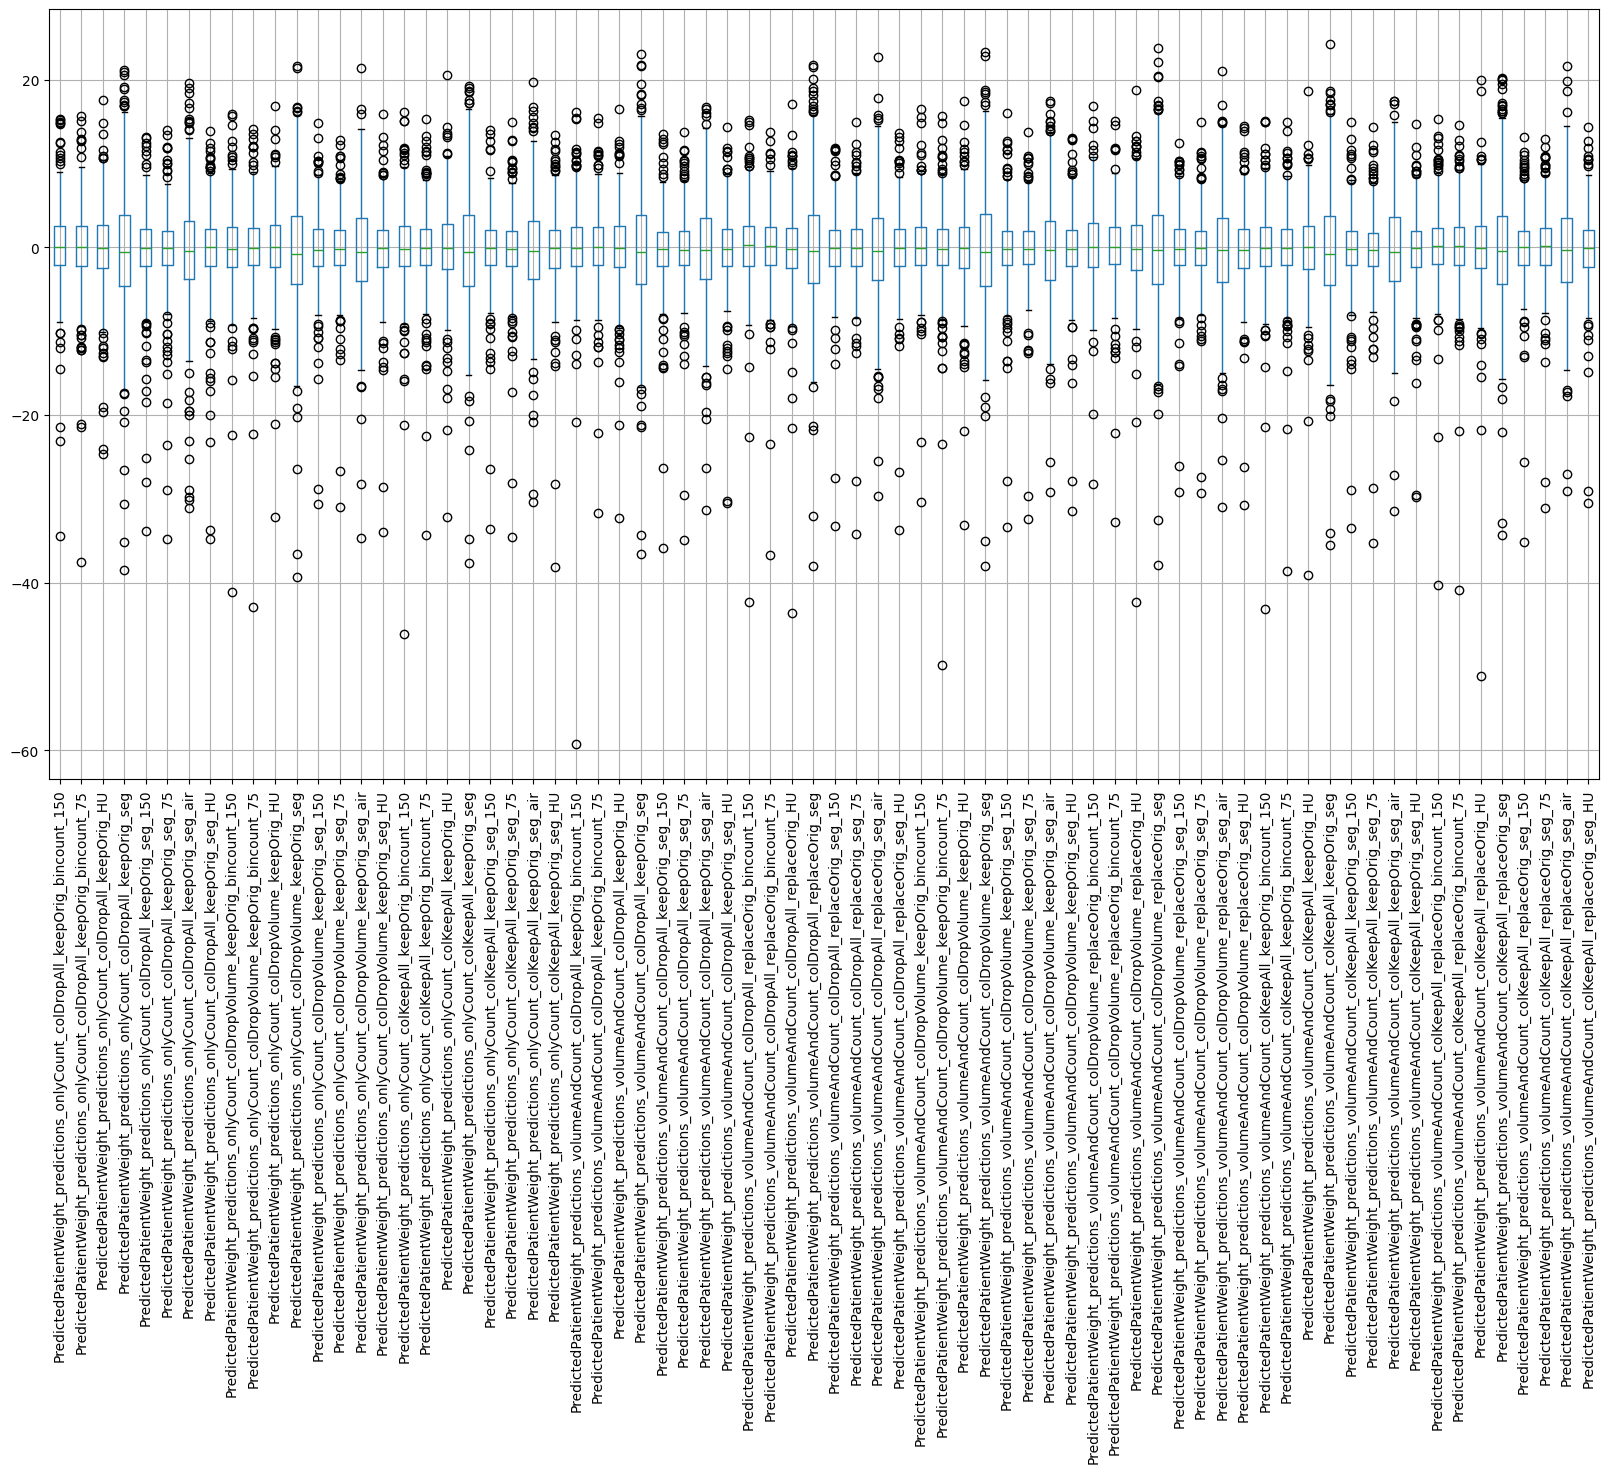

In [11]:
# Plot boxplots of residuals for each model, skip the columns SeriesInstanceUID	PatientWeight
residuals_df.drop(columns=["SeriesInstanceUID", "PatientWeight"]).boxplot(rot=90, figsize=(20, 10))
plt.show()

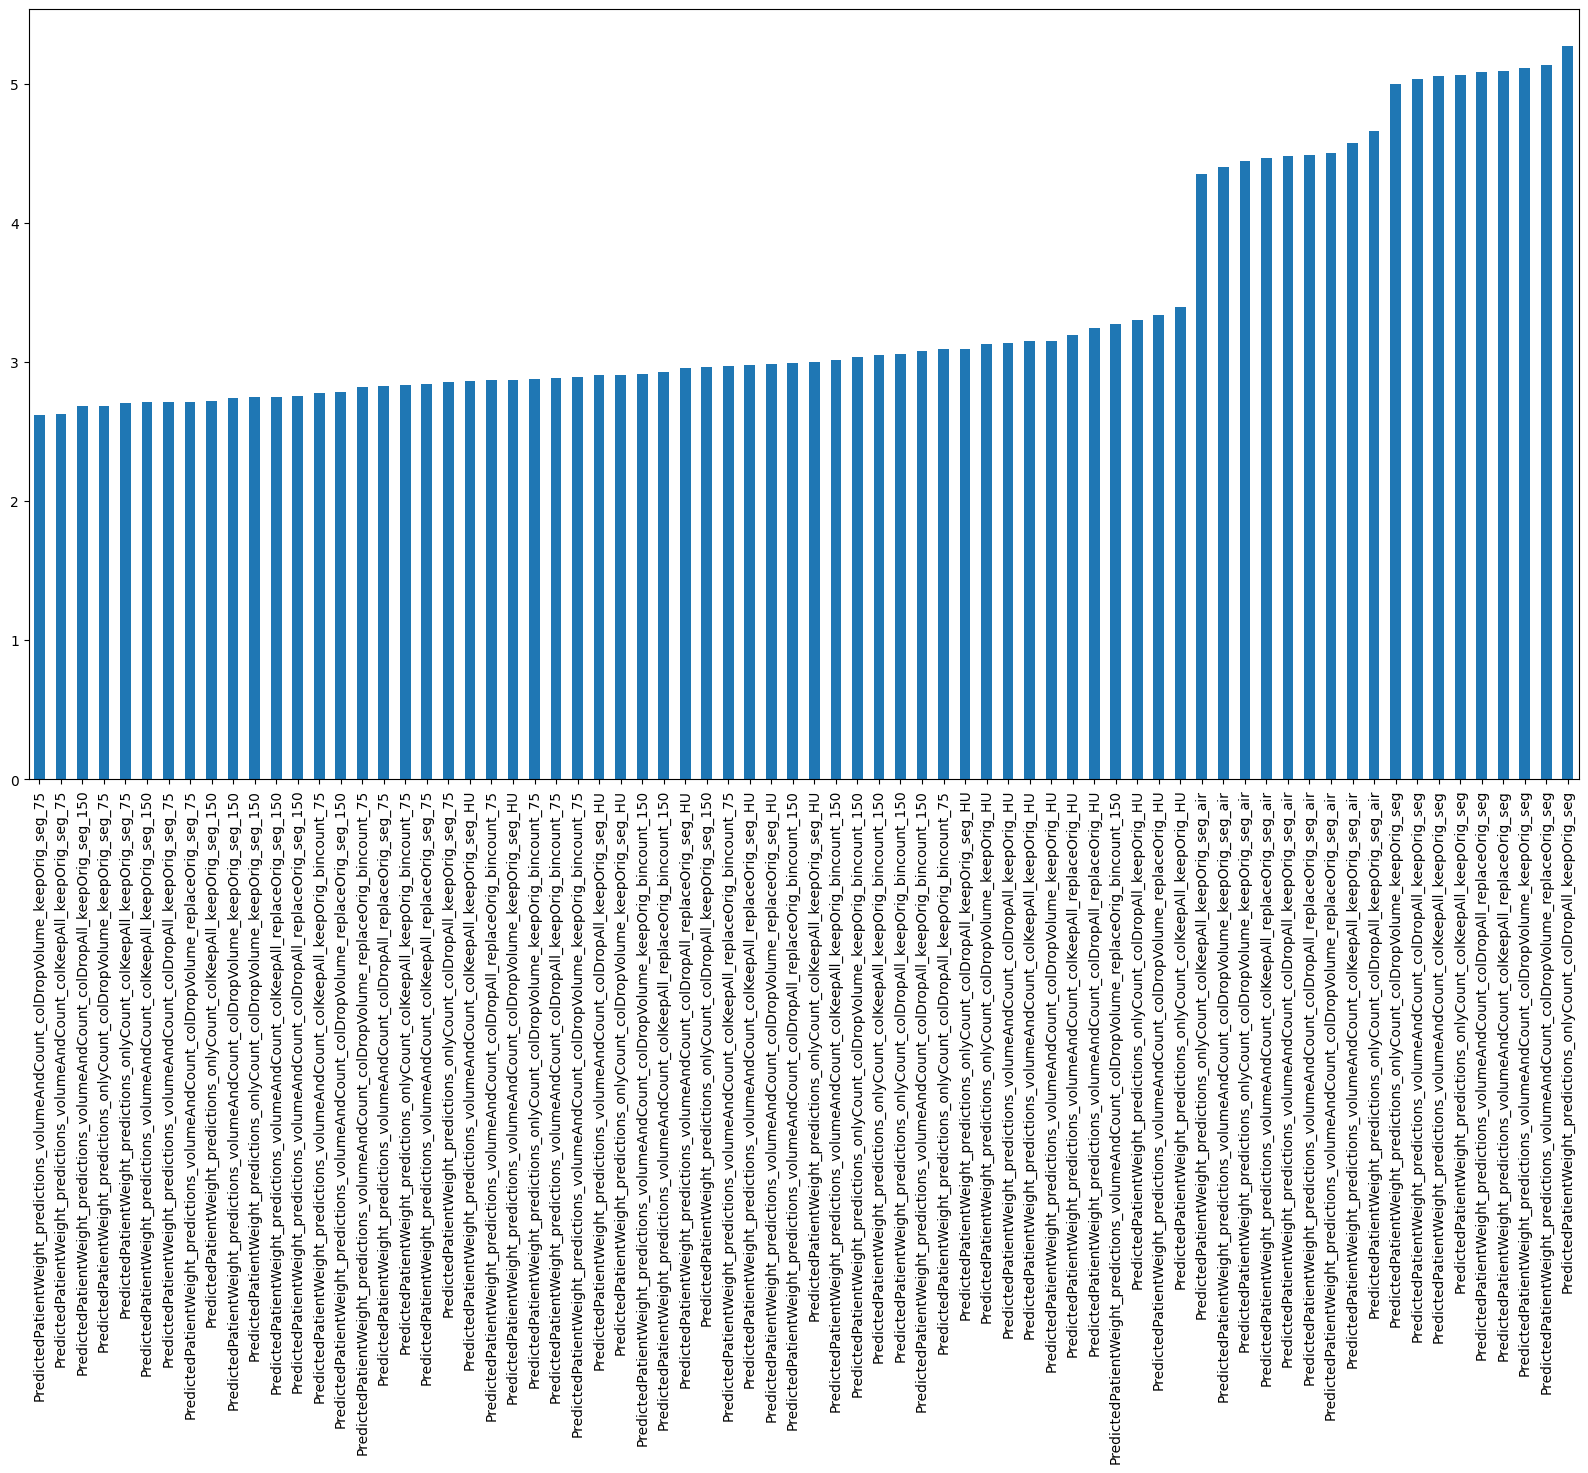

In [12]:
# Calculate the MAE for each and plot it as a barplot sorted by MAE
mae = residuals_df.drop(columns=["SeriesInstanceUID", "PatientWeight"]).abs().mean()
mae = mae.sort_values()
mae.plot(kind="bar", figsize=(20, 10))
plt.show()

In [13]:
residuals_df

,SeriesInstanceUID,PatientWeight,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_bincount_150,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_bincount_75,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_HU,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_150,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_75,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_air,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_HU,...,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_keepOrig_seg_air,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_keepOrig_seg_HU,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_bincount_150,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_bincount_75,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_HU,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_150,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_75,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_air,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_HU
0,1.2.40.0.13.1.28993903218149043348081372551120...,70.0,-0.758039,-0.123445,-0.091245,-7.582098,-3.870636,-3.661943,-6.754475,-3.974948,...,-6.881525,-4.116878,-0.434047,-1.009353,-1.205395,-5.855116,-4.333777,-1.920679,-4.002509,-5.531418
1,1.2.40.0.13.1.16484041000717506379634425838039...,107.0,-1.717903,-9.909997,-9.835031,17.333652,0.151950,-1.201558,8.680893,-3.324971,...,11.907407,-9.152764,-1.341757,-9.996452,-14.061231,17.255508,-4.276578,-10.266723,1.026755,-14.861454
2,1.2.40.0.13.1.15369166470016772395035691884739...,54.0,2.274056,-9.770918,2.171682,-17.470425,-18.469647,-11.203643,-25.300324,-19.977612,...,-3.802338,-7.967127,-5.904596,-4.539643,-4.340260,-2.291335,-3.462484,-1.892085,0.601968,-2.798266
3,1.2.40.0.13.1.16934669894955102956241570719039...,73.0,4.939939,3.859906,4.994972,4.411822,3.107235,2.622028,3.999487,3.771597,...,5.268532,2.806540,1.515164,3.335527,4.231146,4.083840,0.047881,1.098013,1.607866,4.120953
4,1.2.40.0.13.1.12409468971190110111617676171220...,106.0,-0.733249,-2.822008,-5.423690,-7.973190,0.073852,-4.208511,-4.624013,-4.074994,...,-4.584569,-5.913272,-0.727113,2.116976,-3.922031,-2.310179,-4.380229,-4.728202,-3.076698,-5.367700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,1.2.40.0.13.1.26500194564796799093533783873459...,68.0,11.382695,12.890219,5.400130,10.858587,11.007328,11.921357,11.425627,9.515227,...,11.124179,7.326354,12.329958,6.885688,6.004822,8.836873,10.051816,6.734581,8.850327,7.996419
583,1.2.40.0.13.1.26098479406692195187965168170625...,17.0,-34.416819,-37.507412,-24.663255,-35.156116,-33.812366,-34.809482,-30.191600,-34.847792,...,-27.218038,-29.737321,-40.316415,-40.894747,-51.169964,-34.361943,-35.131913,-31.084714,-27.039774,-30.508131
584,1.2.40.0.13.1.11274952054175972577904171290621...,97.0,2.321567,2.192641,5.196651,7.078957,5.938537,4.200317,11.083830,5.241567,...,8.842111,6.009802,4.902106,3.930788,5.513671,8.106490,8.220612,5.820278,9.135413,5.863863
585,1.2.40.0.13.1.41102358271786369454322905863480...,117.0,1.307876,-4.716682,3.636488,12.813800,5.618726,5.199103,14.943721,3.236421,...,13.548371,6.104761,-0.083300,-1.458021,3.650386,16.031434,1.895715,0.323148,13.857369,6.644905


In [14]:
limited_df = residuals_df[(residuals_df['PatientWeight'] >= 50) & (residuals_df['PatientWeight'] <= 100)]

In [15]:
limited_df

,SeriesInstanceUID,PatientWeight,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_bincount_150,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_bincount_75,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_HU,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_150,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_75,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_air,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_HU,...,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_keepOrig_seg_air,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_keepOrig_seg_HU,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_bincount_150,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_bincount_75,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_HU,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_150,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_75,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_air,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_HU
0,1.2.40.0.13.1.28993903218149043348081372551120...,70.0,-0.758039,-0.123445,-0.091245,-7.582098,-3.870636,-3.661943,-6.754475,-3.974948,...,-6.881525,-4.116878,-0.434047,-1.009353,-1.205395,-5.855116,-4.333777,-1.920679,-4.002509,-5.531418
2,1.2.40.0.13.1.15369166470016772395035691884739...,54.0,2.274056,-9.770918,2.171682,-17.470425,-18.469647,-11.203643,-25.300324,-19.977612,...,-3.802338,-7.967127,-5.904596,-4.539643,-4.340260,-2.291335,-3.462484,-1.892085,0.601968,-2.798266
3,1.2.40.0.13.1.16934669894955102956241570719039...,73.0,4.939939,3.859906,4.994972,4.411822,3.107235,2.622028,3.999487,3.771597,...,5.268532,2.806540,1.515164,3.335527,4.231146,4.083840,0.047881,1.098013,1.607866,4.120953
5,1.2.40.0.13.1.31310904547178423590845905845122...,70.0,2.859806,-4.858753,6.188374,-30.665642,-3.042707,-6.804611,-19.473489,1.412912,...,-13.177698,-0.118532,1.959632,0.558919,2.743705,-5.260707,-1.322136,-1.935289,-7.584326,-2.026275
6,1.2.40.0.13.1.32847466704528693663538671433588...,73.0,-23.089732,-21.125196,-24.012561,-17.047568,-25.130763,-23.562123,-28.947811,-23.203446,...,-10.377434,-13.388242,-5.444823,-5.598126,-5.050588,-0.195040,-4.031373,-3.561984,0.309211,-2.922022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1.2.40.0.13.1.66350712997627058739288281075302...,80.0,-0.008542,2.600981,-2.696646,16.834927,5.885880,7.189674,15.016631,5.138199,...,13.804100,4.459762,2.050695,1.266856,-0.045709,14.556554,4.499360,7.713182,14.444954,6.784102
581,1.2.40.0.13.1.33808803540101617850195854757861...,91.0,1.052122,-0.597405,0.296343,4.078285,1.529326,1.726487,4.552847,-1.534773,...,6.611725,-1.732759,0.363935,-0.852590,-0.657327,1.108886,1.242134,0.734094,2.711334,-2.358464
582,1.2.40.0.13.1.26500194564796799093533783873459...,68.0,11.382695,12.890219,5.400130,10.858587,11.007328,11.921357,11.425627,9.515227,...,11.124179,7.326354,12.329958,6.885688,6.004822,8.836873,10.051816,6.734581,8.850327,7.996419
584,1.2.40.0.13.1.11274952054175972577904171290621...,97.0,2.321567,2.192641,5.196651,7.078957,5.938537,4.200317,11.083830,5.241567,...,8.842111,6.009802,4.902106,3.930788,5.513671,8.106490,8.220612,5.820278,9.135413,5.863863


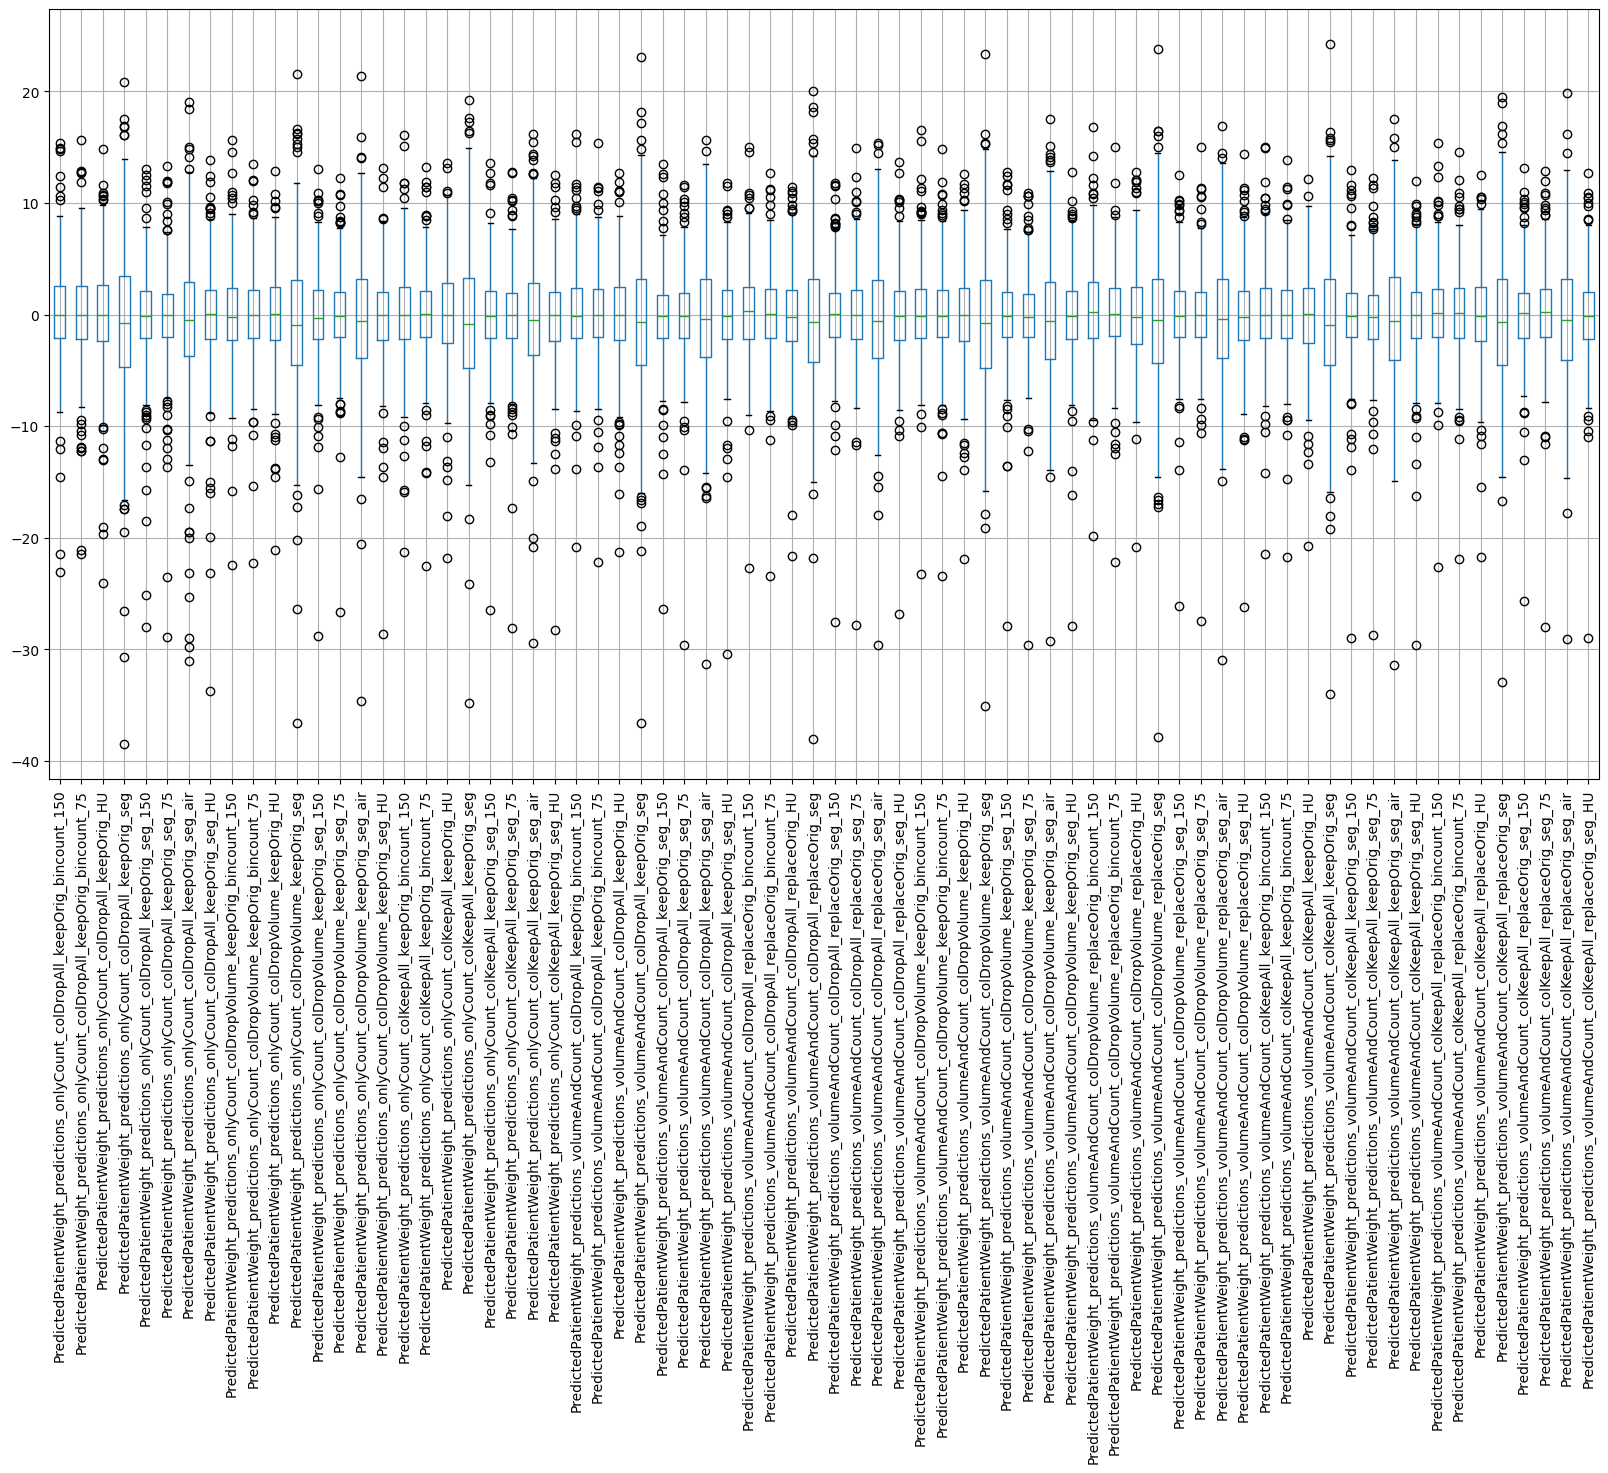

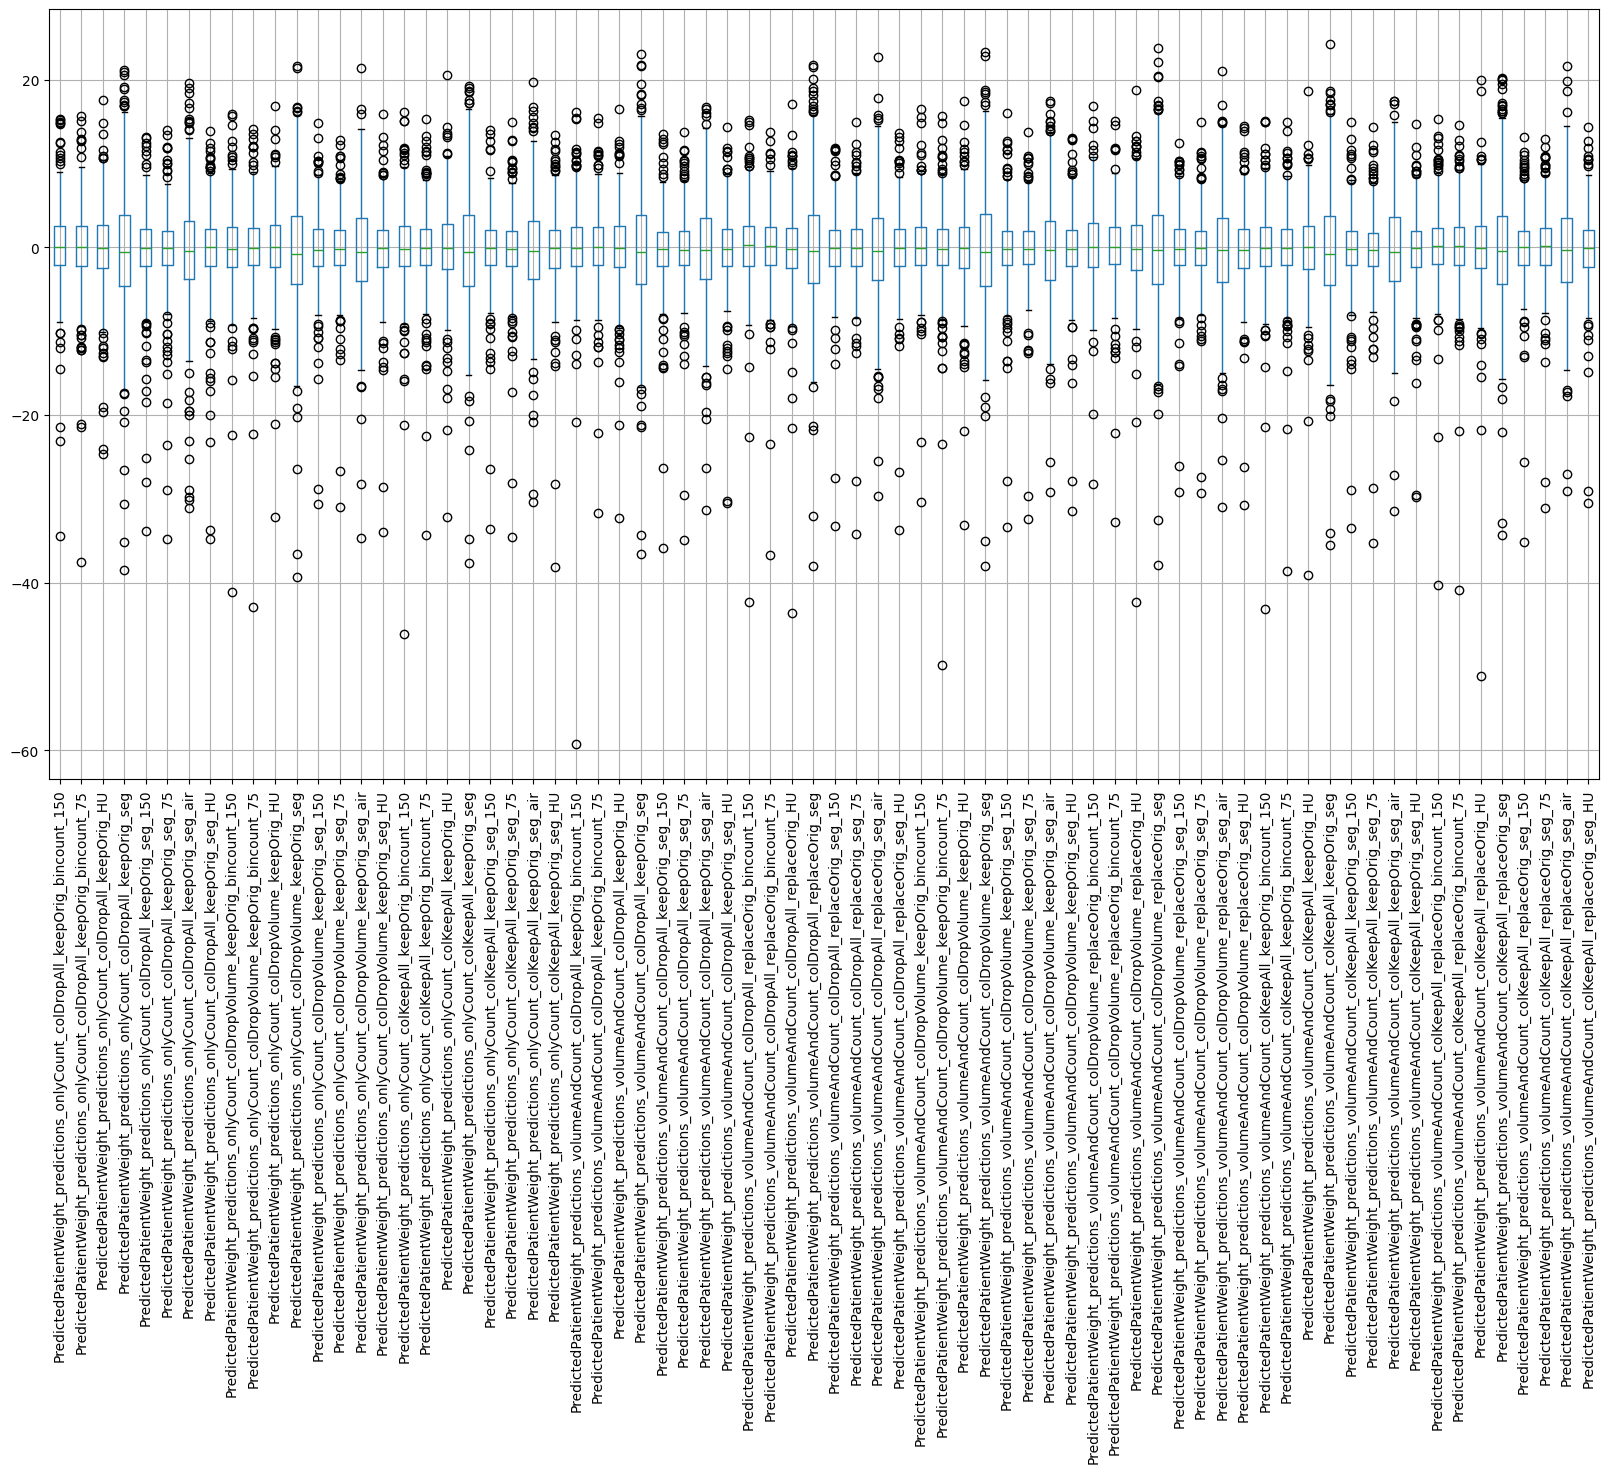

In [16]:
# Plot boxplots of residuals for each model, skip the columns SeriesInstanceUID	PatientWeight
limited_df.drop(columns=["SeriesInstanceUID", "PatientWeight"]).boxplot(rot=90, figsize=(20, 10))
plt.show()
residuals_df.drop(columns=["SeriesInstanceUID", "PatientWeight"]).boxplot(rot=90, figsize=(20, 10))
plt.show()

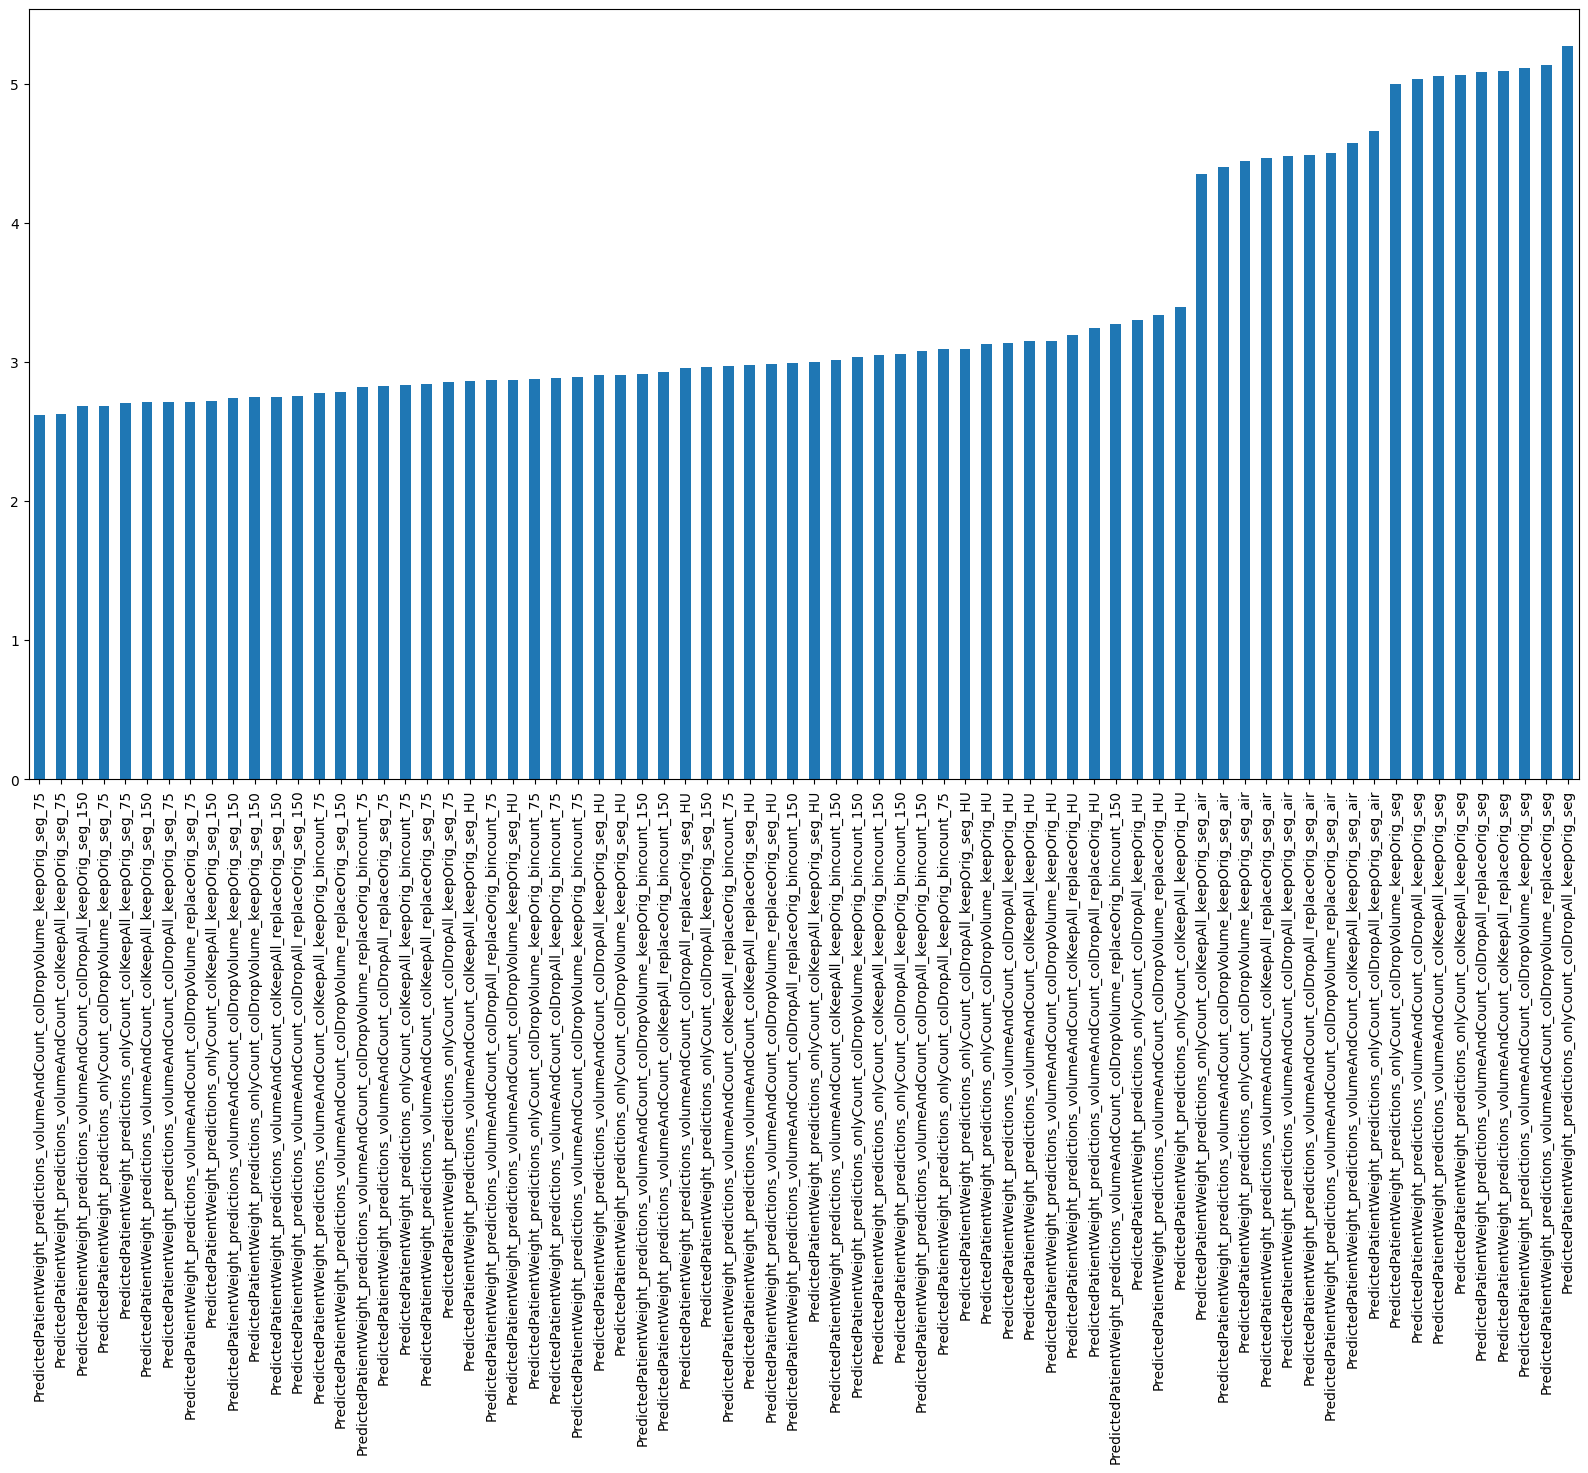

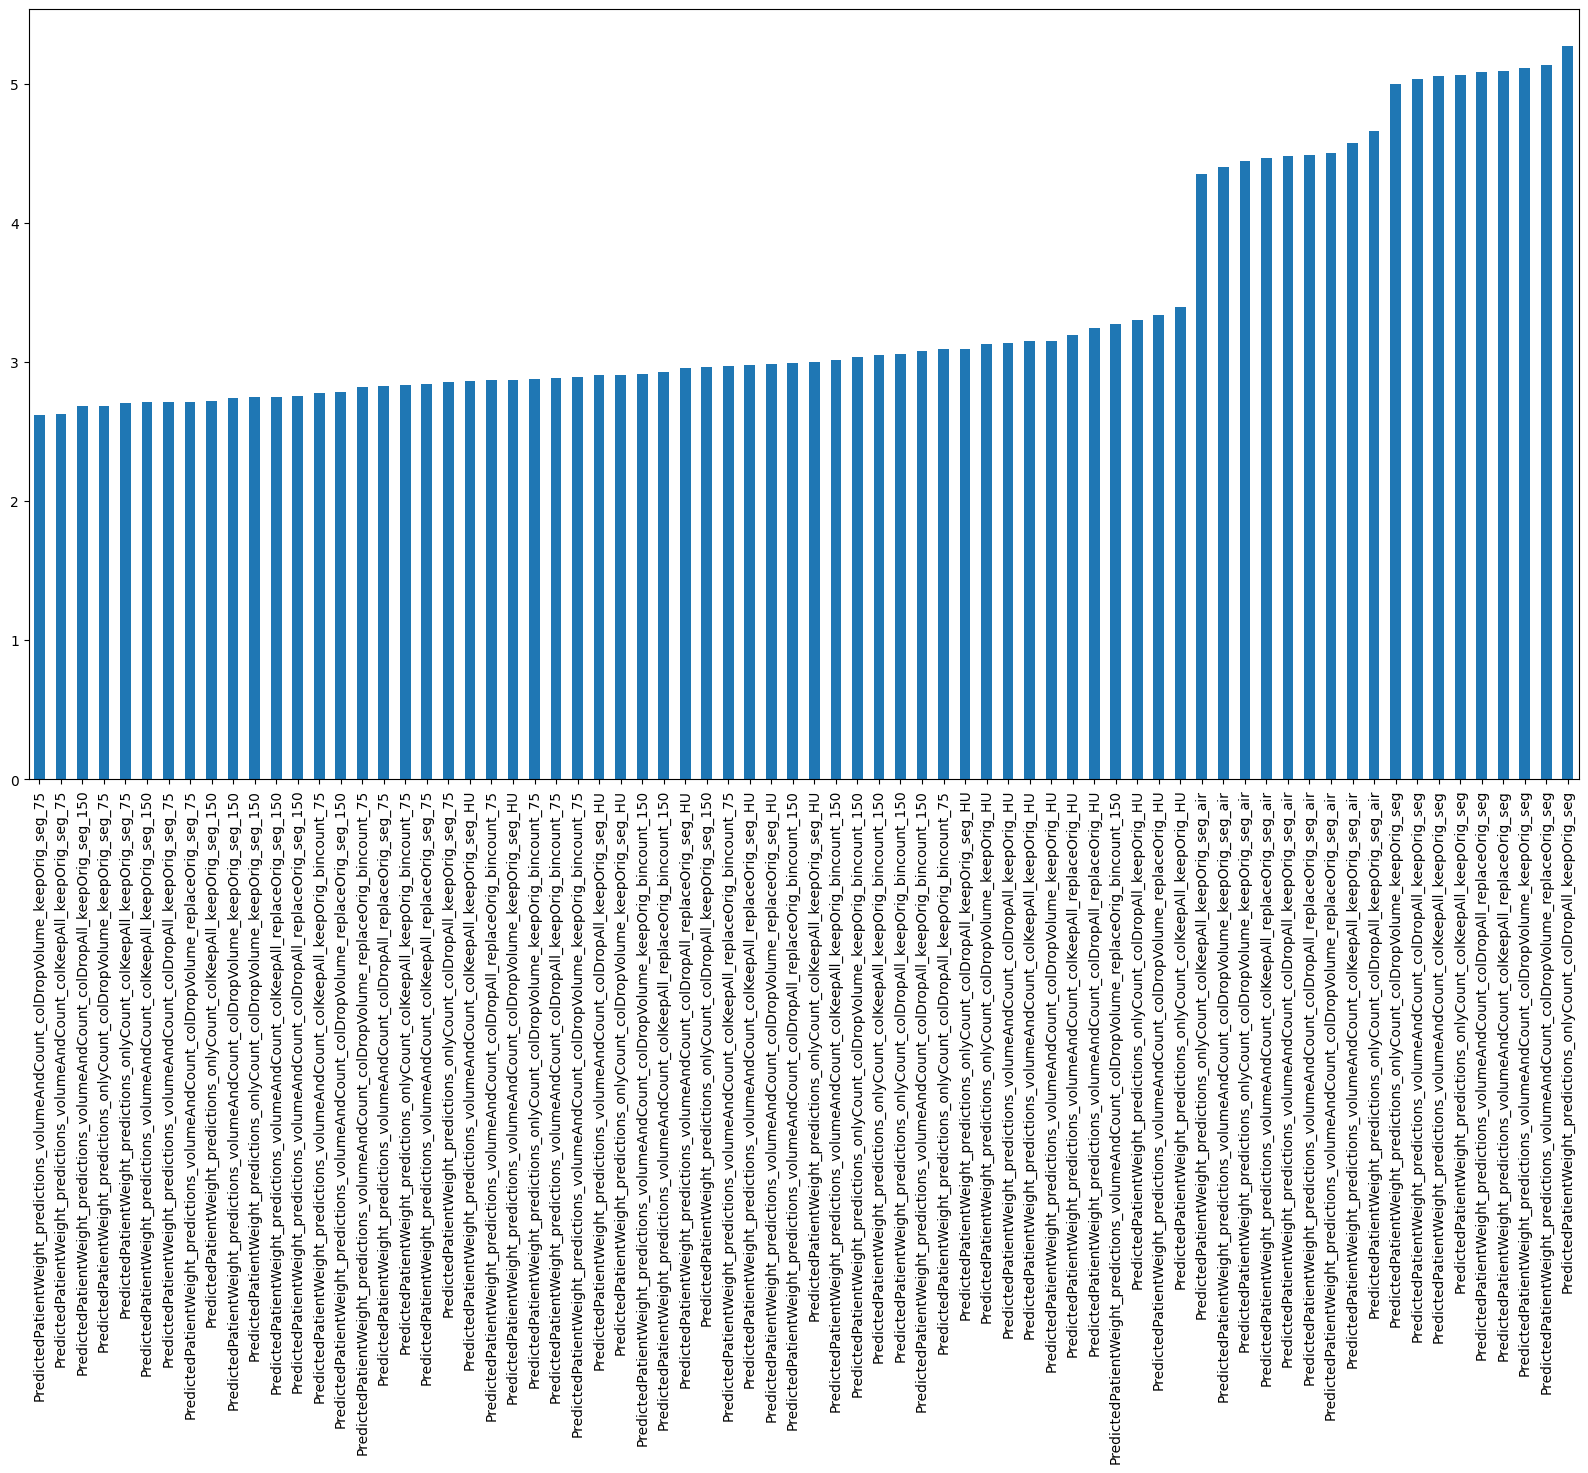

In [17]:
# Calculate the MAE for each and plot it as a barplot sorted by MAE
l_mae = limited_df.drop(columns=["SeriesInstanceUID", "PatientWeight"]).abs().mean()
l_mae = mae.sort_values()
l_mae.plot(kind="bar", figsize=(20, 10))
plt.show()

# Calculate the MAE for each and plot it as a barplot sorted by MAE
mae = residuals_df.drop(columns=["SeriesInstanceUID", "PatientWeight"]).abs().mean()
mae = mae.sort_values()
mae.plot(kind="bar", figsize=(20, 10))
plt.show()

In [18]:
residuals_df

,SeriesInstanceUID,PatientWeight,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_bincount_150,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_bincount_75,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_HU,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_150,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_75,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_air,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg_HU,...,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_keepOrig_seg_air,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_keepOrig_seg_HU,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_bincount_150,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_bincount_75,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_HU,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_150,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_75,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_air,PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_replaceOrig_seg_HU
0,1.2.40.0.13.1.28993903218149043348081372551120...,70.0,-0.758039,-0.123445,-0.091245,-7.582098,-3.870636,-3.661943,-6.754475,-3.974948,...,-6.881525,-4.116878,-0.434047,-1.009353,-1.205395,-5.855116,-4.333777,-1.920679,-4.002509,-5.531418
1,1.2.40.0.13.1.16484041000717506379634425838039...,107.0,-1.717903,-9.909997,-9.835031,17.333652,0.151950,-1.201558,8.680893,-3.324971,...,11.907407,-9.152764,-1.341757,-9.996452,-14.061231,17.255508,-4.276578,-10.266723,1.026755,-14.861454
2,1.2.40.0.13.1.15369166470016772395035691884739...,54.0,2.274056,-9.770918,2.171682,-17.470425,-18.469647,-11.203643,-25.300324,-19.977612,...,-3.802338,-7.967127,-5.904596,-4.539643,-4.340260,-2.291335,-3.462484,-1.892085,0.601968,-2.798266
3,1.2.40.0.13.1.16934669894955102956241570719039...,73.0,4.939939,3.859906,4.994972,4.411822,3.107235,2.622028,3.999487,3.771597,...,5.268532,2.806540,1.515164,3.335527,4.231146,4.083840,0.047881,1.098013,1.607866,4.120953
4,1.2.40.0.13.1.12409468971190110111617676171220...,106.0,-0.733249,-2.822008,-5.423690,-7.973190,0.073852,-4.208511,-4.624013,-4.074994,...,-4.584569,-5.913272,-0.727113,2.116976,-3.922031,-2.310179,-4.380229,-4.728202,-3.076698,-5.367700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,1.2.40.0.13.1.26500194564796799093533783873459...,68.0,11.382695,12.890219,5.400130,10.858587,11.007328,11.921357,11.425627,9.515227,...,11.124179,7.326354,12.329958,6.885688,6.004822,8.836873,10.051816,6.734581,8.850327,7.996419
583,1.2.40.0.13.1.26098479406692195187965168170625...,17.0,-34.416819,-37.507412,-24.663255,-35.156116,-33.812366,-34.809482,-30.191600,-34.847792,...,-27.218038,-29.737321,-40.316415,-40.894747,-51.169964,-34.361943,-35.131913,-31.084714,-27.039774,-30.508131
584,1.2.40.0.13.1.11274952054175972577904171290621...,97.0,2.321567,2.192641,5.196651,7.078957,5.938537,4.200317,11.083830,5.241567,...,8.842111,6.009802,4.902106,3.930788,5.513671,8.106490,8.220612,5.820278,9.135413,5.863863
585,1.2.40.0.13.1.41102358271786369454322905863480...,117.0,1.307876,-4.716682,3.636488,12.813800,5.618726,5.199103,14.943721,3.236421,...,13.548371,6.104761,-0.083300,-1.458021,3.650386,16.031434,1.895715,0.323148,13.857369,6.644905


In [19]:
# Find the best, worst and middle mean absolute error
best = mae.idxmin()
worst = mae.idxmax()
middle = mae.index[len(mae) // 2]

best_residuals = residuals_df[["SeriesInstanceUID", "PatientWeight", best]]
worst_residuals = residuals_df[["SeriesInstanceUID", worst]]
middle_residuals = residuals_df[["SeriesInstanceUID", middle]]

merged_residuals = pd.merge(best_residuals, worst_residuals, on="SeriesInstanceUID", how="inner")
merged_residuals = pd.merge(merged_residuals, middle_residuals, on="SeriesInstanceUID", how="inner")
merged_residuals

,SeriesInstanceUID,PatientWeight,PredictedPatientWeight_predictions_volumeAndCount_colDropVolume_keepOrig_seg_75,PredictedPatientWeight_predictions_onlyCount_colDropAll_keepOrig_seg,PredictedPatientWeight_predictions_onlyCount_colKeepAll_keepOrig_seg_HU
0,1.2.40.0.13.1.28993903218149043348081372551120...,70.0,-4.055166,-7.582098,-5.349425
1,1.2.40.0.13.1.16484041000717506379634425838039...,107.0,-4.399993,17.333652,-5.474689
2,1.2.40.0.13.1.15369166470016772395035691884739...,54.0,-7.433151,-17.470425,-11.341498
3,1.2.40.0.13.1.16934669894955102956241570719039...,73.0,1.378434,4.411822,3.926668
4,1.2.40.0.13.1.12409468971190110111617676171220...,106.0,-3.751537,-7.973190,-5.723692
...,...,...,...,...,...
582,1.2.40.0.13.1.26500194564796799093533783873459...,68.0,10.644928,10.858587,8.217648
583,1.2.40.0.13.1.26098479406692195187965168170625...,17.0,-32.464812,-35.156116,-38.092283
584,1.2.40.0.13.1.11274952054175972577904171290621...,97.0,3.259592,7.078957,5.038712
585,1.2.40.0.13.1.41102358271786369454322905863480...,117.0,5.810603,12.813800,9.086963


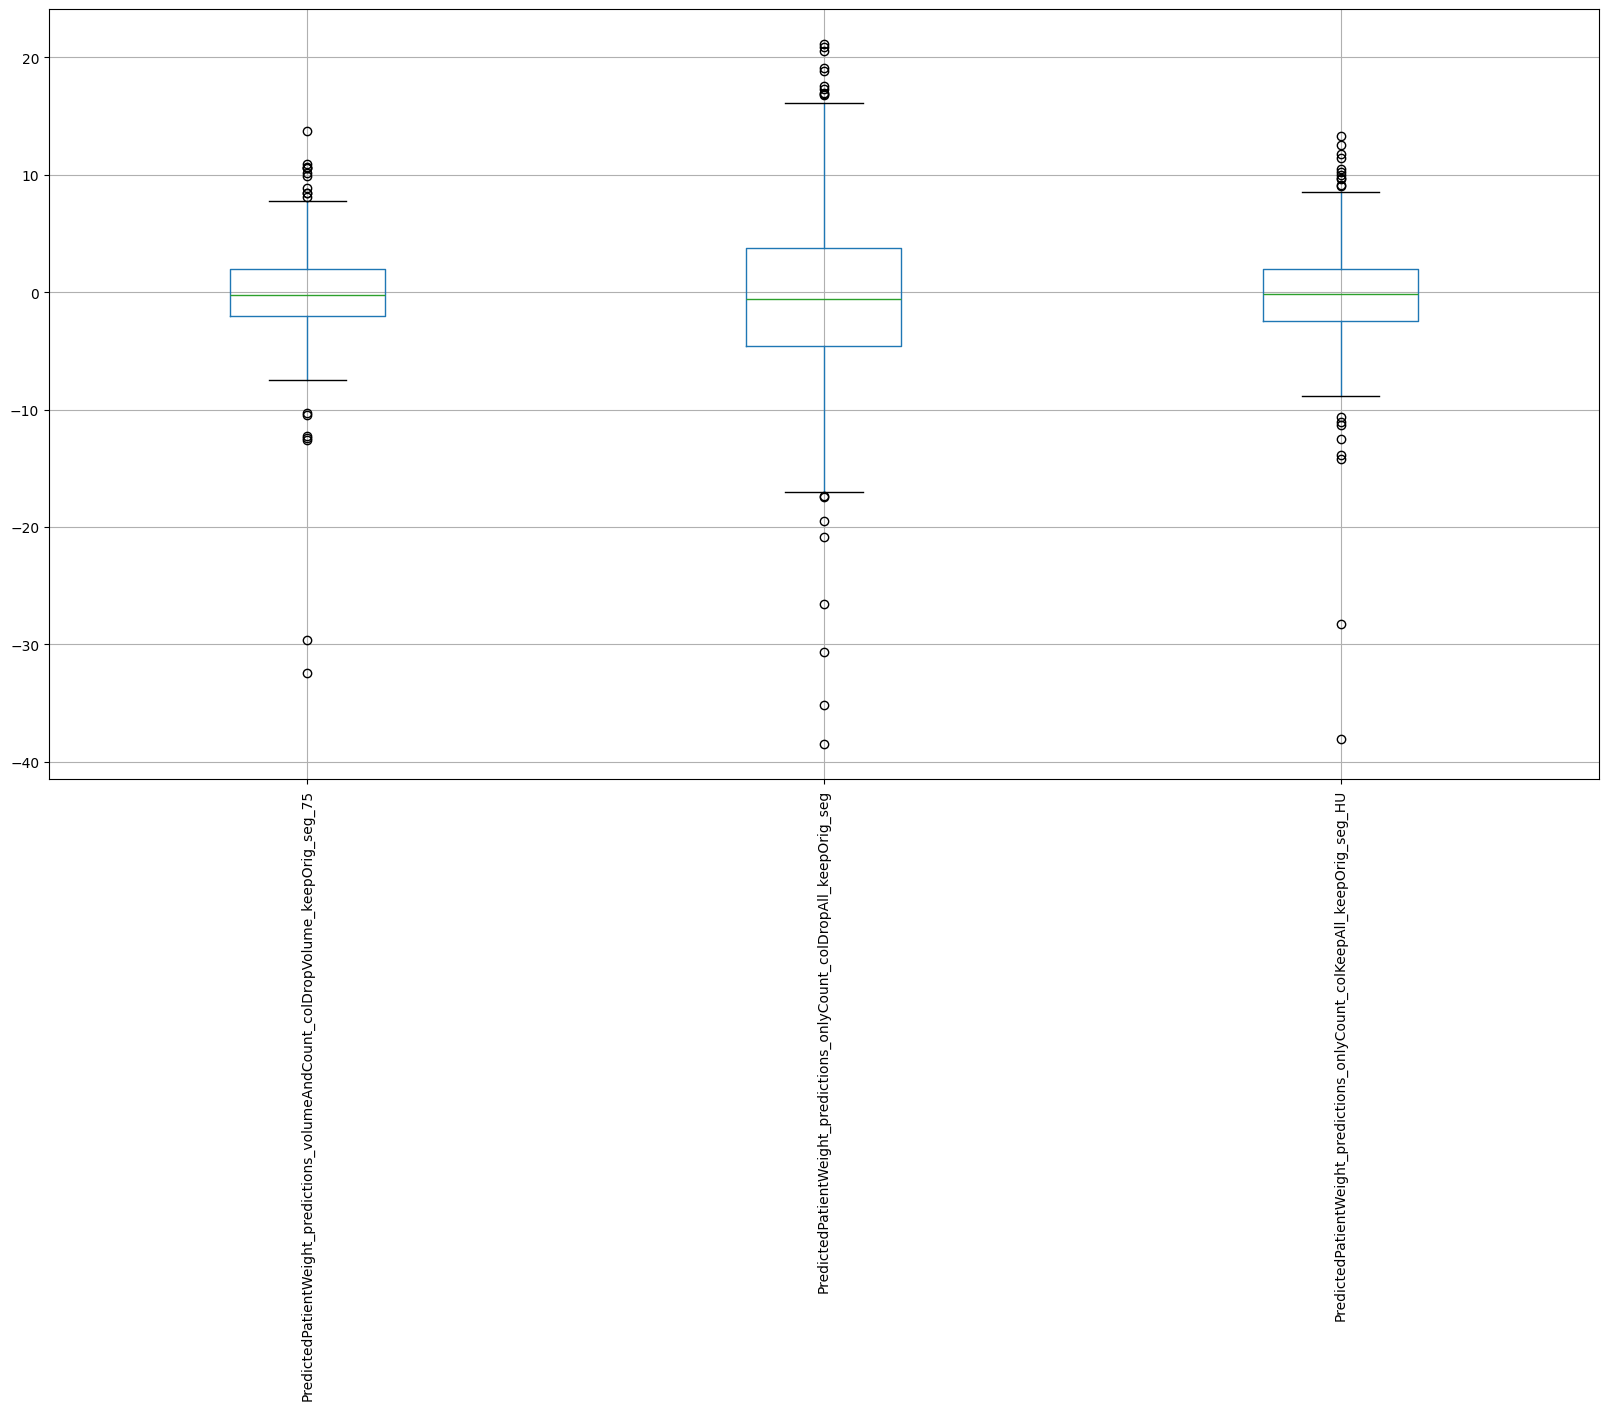

In [20]:
# Boxplot columns except SeriesInstanceUID and PatientWeight
merged_residuals.drop(columns=["SeriesInstanceUID", "PatientWeight"]).boxplot(rot=90, figsize=(20, 10))
plt.show()

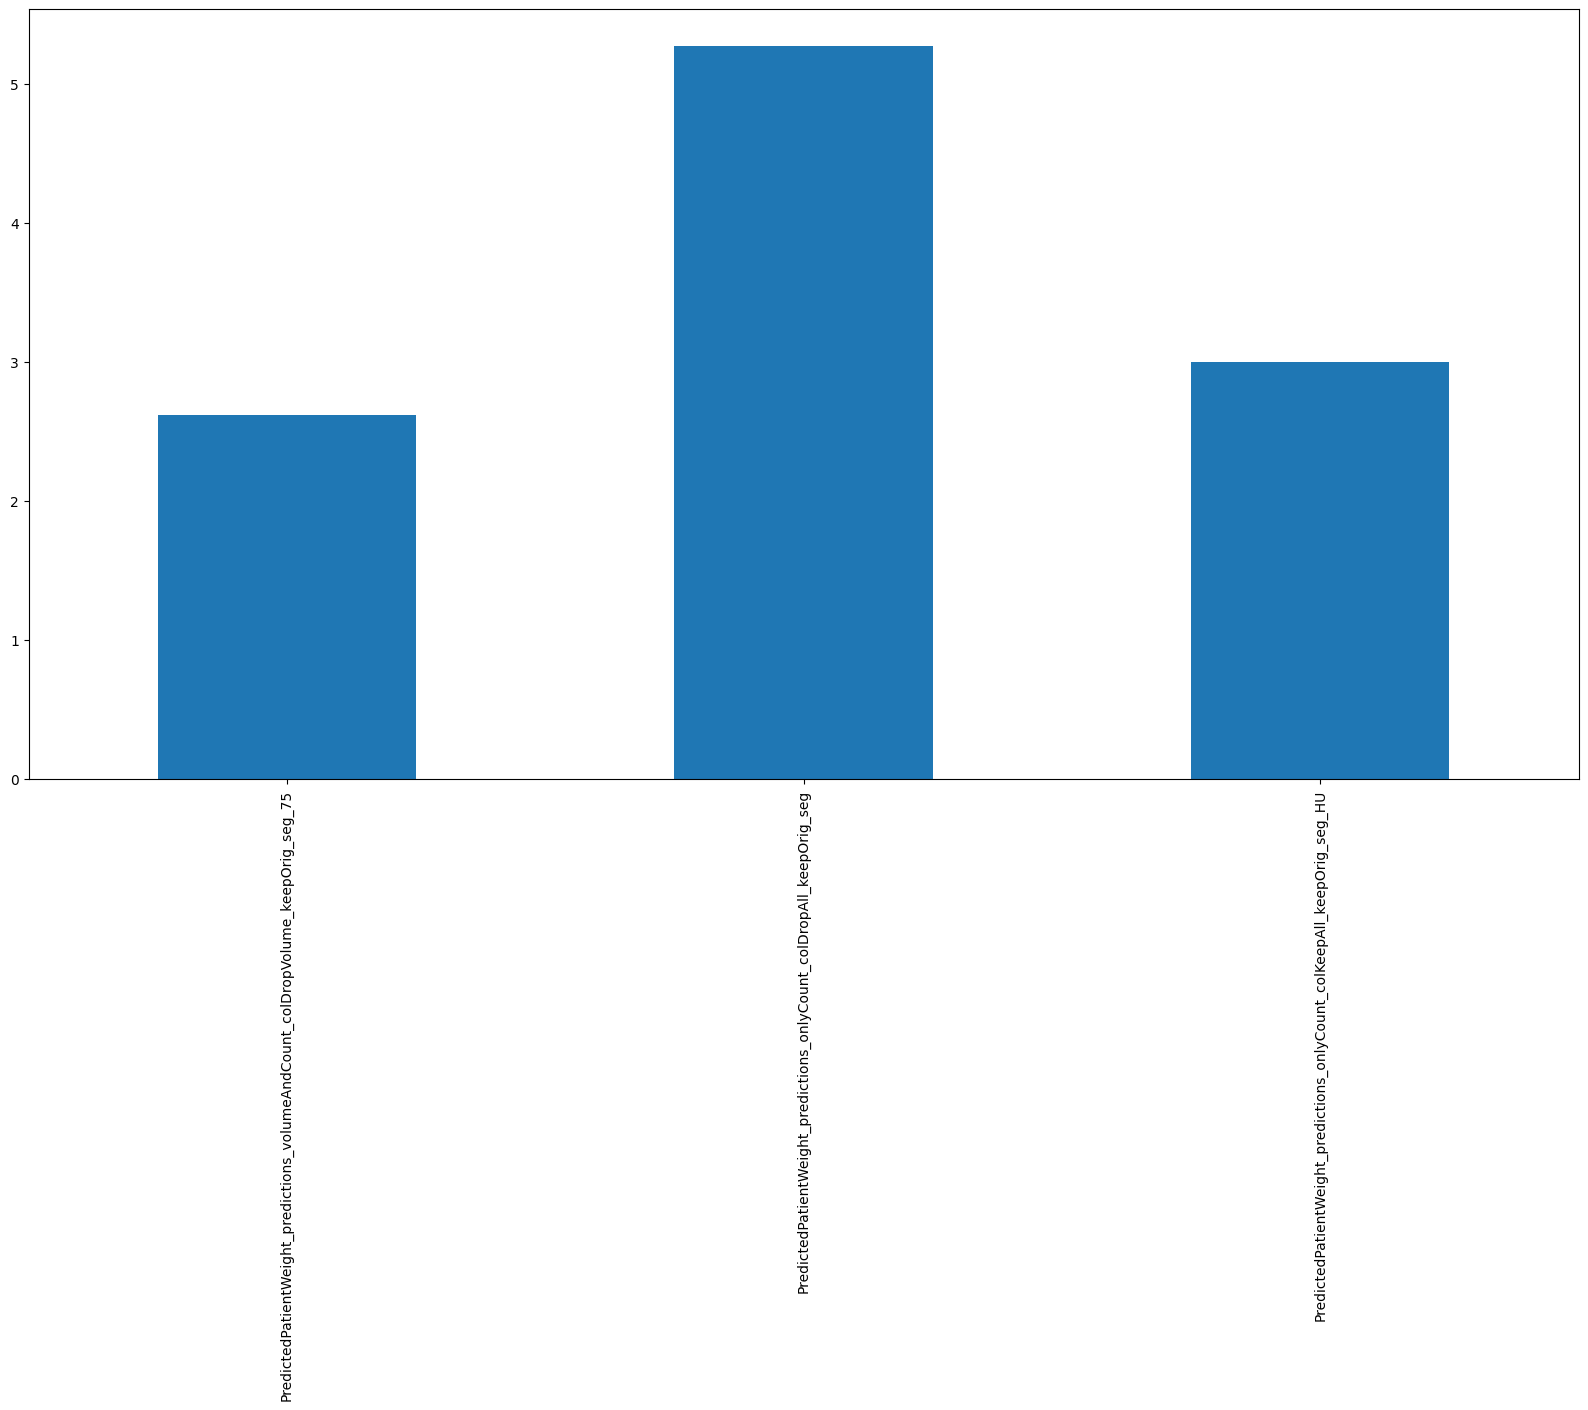

In [21]:
# Plot mean absolute error columns except SeriesInstanceUID and PatientWeight
merged_residuals.drop(columns=["SeriesInstanceUID", "PatientWeight"]).abs().mean().plot(kind="bar", figsize=(20, 10))
plt.show()

In [22]:
# best_residuals ordered by best_residuals top 10
best_residuals = best_residuals.sort_values(by=best, ascending=False)
best_residuals

,SeriesInstanceUID,PatientWeight,PredictedPatientWeight_predictions_volumeAndCount_colDropVolume_keepOrig_seg_75
181,1.2.40.0.13.1.30291095291048010308315804720563...,102.0,13.778913
411,1.2.40.0.13.1.26954060860199277056380322610369...,80.0,10.894057
582,1.2.40.0.13.1.26500194564796799093533783873459...,68.0,10.644928
453,1.2.40.0.13.1.22011314874195168494487356767334...,74.0,10.600888
306,1.2.40.0.13.1.78429238867754994654177461298244...,72.0,10.595239
...,...,...,...
6,1.2.40.0.13.1.32847466704528693663538671433588...,73.0,-12.207037
31,1.2.40.0.13.1.26035519661213803332876180998834...,46.0,-12.431219
304,1.2.40.0.13.1.25490818072901112513543523181130...,108.0,-12.618078
70,1.2.40.0.13.1.25319661460706284738720653395123...,57.0,-29.640324


In [23]:
best_limited = best_residuals[(best_residuals['PatientWeight'] >= 50) & (best_residuals['PatientWeight'] <= 100)].sort_values(by=best, ascending=False)
best_limited

,SeriesInstanceUID,PatientWeight,PredictedPatientWeight_predictions_volumeAndCount_colDropVolume_keepOrig_seg_75
411,1.2.40.0.13.1.26954060860199277056380322610369...,80.0,10.894057
582,1.2.40.0.13.1.26500194564796799093533783873459...,68.0,10.644928
453,1.2.40.0.13.1.22011314874195168494487356767334...,74.0,10.600888
306,1.2.40.0.13.1.78429238867754994654177461298244...,72.0,10.595239
511,1.2.40.0.13.1.62000525865489466299323842246504...,75.0,9.875155
...,...,...,...
188,1.2.40.0.13.1.21605041912472127447284505352034...,74.0,-7.491338
385,1.2.40.0.13.1.87567595179137260348086302334168...,50.0,-10.274544
444,1.2.40.0.13.1.31218478081135373285403083565308...,84.0,-10.475893
6,1.2.40.0.13.1.32847466704528693663538671433588...,73.0,-12.207037


In [24]:
meta_all_df = pd.read_feather(PATH_TO_CLEANED_DICOM_DF)
meta_all_df

,PatientId,PatientAge,PatientSex,PatientWeight,PatientSize,BodyPart,Rows,Columns,SliceCount,PixelSpacing,SliceThickness,RescaleSlope,RescaleIntercept,SeriesInstanceUID,SliceDirectory
0,ANONYM-3X1ZSG,50,M,107.0,1.83,Kopf/Stamm/Teilkörper,512,512,903,1.171875,3.0,1.0,-1024.0,1.2.40.0.13.1.31071640450076763248773322620109...,/srv/GadM/Datasets/AIBA_CT_KG/2021-02/1004693C...
1,ANONYM-3X1ZSG_1,61,F,46.0,1.61,Stamm,512,512,263,0.976562,3.0,1.0,-1024.0,1.2.40.0.13.1.28611523484845610500759615941748...,/srv/GadM/Datasets/AIBA_CT_KG/2021-02/10046CC6...
2,ANONYM-3X1ZSG_2,59,M,107.0,1.72,Stamm,512,512,293,0.976562,3.0,1.0,-1024.0,1.2.40.0.13.1.29372383852567236771106277061240...,/srv/GadM/Datasets/AIBA_CT_KG/2021-02/10046DD0...
3,ANONYM-3X1ZSG_3,67,F,94.0,1.68,Kopf/Stamm,512,512,323,0.976562,3.0,1.0,-1024.0,1.2.40.0.13.1.18346535543421060503397480566267...,/srv/GadM/Datasets/AIBA_CT_KG/2021-02/10046EF8...
4,ANONYM-3X1ZSG_4,61,M,103.0,1.76,Ganzkörper,512,512,487,0.976562,4.0,1.0,-1024.0,1.2.40.0.13.1.12817359503655381020457398908758...,/srv/GadM/Datasets/AIBA_CT_KG/2021-02/1004703E...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,ANONYM-6LL37I_519,55,F,49.0,1.58,Stamm,512,512,567,1.171875,3.0,1.0,-1024.0,1.2.40.0.13.1.22055339428679588669178744381225...,/srv/GadM/Datasets/AIBA_CT_KG/2021-03/10063CCC...
5037,ANONYM-6LL37I_520,51,F,63.0,1.74,Stamm,512,512,293,0.976562,3.0,1.0,-1024.0,1.2.40.0.13.1.15802889953337295246497758301352...,/srv/GadM/Datasets/AIBA_CT_KG/2021-03/10064142...
5038,ANONYM-6LL37I_521,70,F,77.0,1.59,Kopf/Stamm,512,512,323,0.976562,3.0,1.0,-1024.0,1.2.40.0.13.1.12285507575477120912134857019998...,/srv/GadM/Datasets/AIBA_CT_KG/2021-03/10064396...
5039,ANONYM-6LL37I_522,90,M,69.0,1.76,Stamm,512,512,567,1.171875,3.0,1.0,-1024.0,1.2.40.0.13.1.56298341537091980176000389528343...,/srv/GadM/Datasets/AIBA_CT_KG/2021-03/10064626...


In [25]:
# join best_limited and meta_all_df on SeriesInstanceUID (but only SliceCount)
joined_best = pd.merge(best_limited, meta_all_df[["SeriesInstanceUID", "SliceCount"]], on="SeriesInstanceUID", how="inner")
joined_best

,SeriesInstanceUID,PatientWeight,PredictedPatientWeight_predictions_volumeAndCount_colDropVolume_keepOrig_seg_75,SliceCount
0,1.2.40.0.13.1.26954060860199277056380322610369...,80.0,10.894057,567
1,1.2.40.0.13.1.26500194564796799093533783873459...,68.0,10.644928,263
2,1.2.40.0.13.1.22011314874195168494487356767334...,74.0,10.600888,293
3,1.2.40.0.13.1.78429238867754994654177461298244...,72.0,10.595239,234
4,1.2.40.0.13.1.62000525865489466299323842246504...,75.0,9.875155,568
...,...,...,...,...
515,1.2.40.0.13.1.21605041912472127447284505352034...,74.0,-7.491338,293
516,1.2.40.0.13.1.87567595179137260348086302334168...,50.0,-10.274544,511
517,1.2.40.0.13.1.31218478081135373285403083565308...,84.0,-10.475893,511
518,1.2.40.0.13.1.32847466704528693663538671433588...,73.0,-12.207037,263


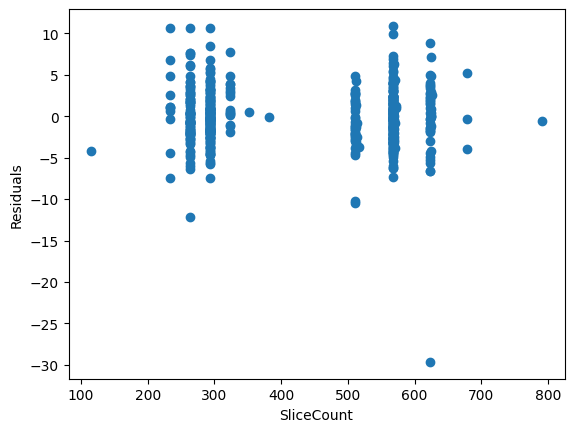

In [26]:
# scatter plot residuals and slice count
plt.scatter(joined_best["SliceCount"], joined_best["PredictedPatientWeight_predictions_volumeAndCount_colDropVolume_keepOrig_seg_75"])
plt.xlabel("SliceCount")
plt.ylabel("Residuals")
plt.show()

In [29]:
# find row where seriesInstanceUID starts with 1.2.40.0.13.1.25319661460706284738720653
worst_row = meta_all_df[meta_all_df["SeriesInstanceUID"].str.startswith("1.2.40.0.13.1.25319661460706284738720653")]
worst_row

,PatientId,PatientAge,PatientSex,PatientWeight,PatientSize,BodyPart,Rows,Columns,SliceCount,PixelSpacing,SliceThickness,RescaleSlope,RescaleIntercept,SeriesInstanceUID,SliceDirectory
561,ANONYM-OCOPMB_175,69,M,57.0,1.84,Stamm,512,512,623,1.171875,3.0,1.0,-1024.0,1.2.40.0.13.1.25319661460706284738720653395123...,/srv/GadM/Datasets/AIBA_CT_KG/2021-07/10013454...


In [32]:
# print all keys and values of the pandas series mae
for key, value in mae.items():
    print(key, value)

PredictedPatientWeight_predictions_volumeAndCount_colDropVolume_keepOrig_seg_75 2.621215179480942
PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_keepOrig_seg_75 2.623825316670865
PredictedPatientWeight_predictions_volumeAndCount_colDropAll_keepOrig_seg_150 2.6835483488040075
PredictedPatientWeight_predictions_onlyCount_colDropVolume_keepOrig_seg_75 2.6856672452179113
PredictedPatientWeight_predictions_onlyCount_colKeepAll_keepOrig_seg_75 2.7061900441971187
PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_keepOrig_seg_150 2.708936665356672
PredictedPatientWeight_predictions_volumeAndCount_colDropAll_keepOrig_seg_75 2.710244936761309
PredictedPatientWeight_predictions_volumeAndCount_colDropVolume_replaceOrig_seg_75 2.7144676916079375
PredictedPatientWeight_predictions_onlyCount_colKeepAll_keepOrig_seg_150 2.7163292383132593
PredictedPatientWeight_predictions_volumeAndCount_colDropVolume_keepOrig_seg_150 2.7411699996420476
PredictedPatientWeight_predictions_onlyC

In [64]:
# Best models segmentation
# Best: PredictedPatientWeight_predictions_volumeAndCount_colDropVolume_keepOrig_seg_75
# Middle: PredictedPatientWeight_predictions_onlyCount_colKeepAll_keepOrig_seg_air
# Worst: PredictedPatientWeight_predictions_onlyCount_colDropVolume_keepOrig_seg

# Best model histogram
# Best: PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_keepOrig_bincount_75
# Middle: PredictedPatientWeight_predictions_volumeAndCount_colDropVolume_keepOrig_bincount_150
# Worst: PredictedPatientWeight_predictions_onlyCount_colKeepAll_keepOrig_HU

best_seg_df = dfs["predictions_volumeAndCount_colDropVolume_keepOrig_seg_75"]
middle_seg_df = dfs["predictions_onlyCount_colKeepAll_keepOrig_seg_air"]
worst_seg_df = dfs["predictions_onlyCount_colDropVolume_keepOrig_seg"]

best_seg_df = pd.merge(best_seg_df, meta_df, on="SeriesInstanceUID", how="inner")
best_seg_df["Model"] = "Best_Segmentaion"
best_seg_df["Deviation"] = best_seg_df["PatientWeight"] - best_seg_df["PredictedPatientWeight"]
best_seg_df = pd.merge(best_seg_df, train_test_split_df, on="SeriesInstanceUID", how="inner")

final_seg_df = best_seg_df[["Model", "PatientWeight", "PredictedPatientWeight", "Deviation"]]
final_seg_df = final_seg_df.rename(columns={"PredictedPatientWeight": "Prediction", "PatientWeight": "Actual"})

middle_seg_df = pd.merge(middle_seg_df, meta_df, on="SeriesInstanceUID", how="inner")
middle_seg_df["Model"] = "Middle_Segmentaion"
middle_seg_df["Deviation"] = middle_seg_df["PatientWeight"] - middle_seg_df["PredictedPatientWeight"]
middle_seg_df = pd.merge(middle_seg_df, train_test_split_df, on="SeriesInstanceUID", how="inner")
middle_seg_df = middle_seg_df[["Model", "PatientWeight", "PredictedPatientWeight", "Deviation"]]
middle_seg_df = middle_seg_df.rename(columns={"PredictedPatientWeight": "Prediction", "PatientWeight": "Actual"})

worst_seg_df = pd.merge(worst_seg_df, meta_df, on="SeriesInstanceUID", how="inner")
worst_seg_df["Model"] = "Worst_Segmentaion"
worst_seg_df["Deviation"] = worst_seg_df["PatientWeight"] - worst_seg_df["PredictedPatientWeight"]
worst_seg_df = pd.merge(worst_seg_df, train_test_split_df, on="SeriesInstanceUID", how="inner")
worst_seg_df = worst_seg_df[["Model", "PatientWeight", "PredictedPatientWeight", "Deviation"]]
worst_seg_df = worst_seg_df.rename(columns={"PredictedPatientWeight": "Prediction", "PatientWeight": "Actual"})

final_seg_df = pd.concat([final_seg_df, middle_seg_df, worst_seg_df])
final_seg_df

final_seg_df.to_csv("final_seg_df.csv", index=False)

In [65]:
# Best models segmentation
# Best: PredictedPatientWeight_predictions_volumeAndCount_colDropVolume_keepOrig_seg_75
# Middle: PredictedPatientWeight_predictions_onlyCount_colKeepAll_keepOrig_seg_air
# Worst: PredictedPatientWeight_predictions_onlyCount_colDropVolume_keepOrig_seg

# Best model histogram
# Best: PredictedPatientWeight_predictions_volumeAndCount_colKeepAll_keepOrig_bincount_75
# Middle: PredictedPatientWeight_predictions_volumeAndCount_colDropVolume_keepOrig_bincount_150
# Worst: PredictedPatientWeight_predictions_onlyCount_colKeepAll_keepOrig_HU

best_hist_df = dfs["predictions_volumeAndCount_colKeepAll_keepOrig_bincount_75"]
middle_hist_df = dfs["predictions_volumeAndCount_colDropVolume_keepOrig_bincount_150"]
worst_hist_df = dfs["predictions_onlyCount_colKeepAll_keepOrig_HU"]

best_hist_df = pd.merge(best_hist_df, meta_df, on="SeriesInstanceUID", how="inner")
best_hist_df["Model"] = "Best_Histogram"
best_hist_df["Deviation"] = best_hist_df["PatientWeight"] - best_hist_df["PredictedPatientWeight"]
best_hist_df = pd.merge(best_hist_df, train_test_split_df, on="SeriesInstanceUID", how="inner")

final_hist_df = best_hist_df[["Model", "PatientWeight", "PredictedPatientWeight", "Deviation"]]
final_hist_df = final_hist_df.rename(columns={"PredictedPatientWeight": "Prediction", "PatientWeight": "Actual"})

middle_hist_df = pd.merge(middle_hist_df, meta_df, on="SeriesInstanceUID", how="inner")
middle_hist_df["Model"] = "Middle_Histogram"
middle_hist_df["Deviation"] = middle_hist_df["PatientWeight"] - middle_hist_df["PredictedPatientWeight"]
middle_hist_df = pd.merge(middle_hist_df, train_test_split_df, on="SeriesInstanceUID", how="inner")
middle_hist_df = middle_hist_df[["Model", "PatientWeight", "PredictedPatientWeight", "Deviation"]]
middle_hist_df = middle_hist_df.rename(columns={"PredictedPatientWeight": "Prediction", "PatientWeight": "Actual"})

worst_hist_df = pd.merge(worst_hist_df, meta_df, on="SeriesInstanceUID", how="inner")
worst_hist_df["Model"] = "Worst_Histogram"
worst_hist_df["Deviation"] = worst_hist_df["PatientWeight"] - worst_hist_df["PredictedPatientWeight"]
worst_hist_df = pd.merge(worst_hist_df, train_test_split_df, on="SeriesInstanceUID", how="inner")
worst_hist_df = worst_hist_df[["Model", "PatientWeight", "PredictedPatientWeight", "Deviation"]]
worst_hist_df = worst_hist_df.rename(columns={"PredictedPatientWeight": "Prediction", "PatientWeight": "Actual"})

final_hist_df = pd.concat([final_hist_df, middle_hist_df, worst_hist_df])
final_hist_df

final_hist_df.to_csv("final_hist_df.csv", index=False)